/var/folders/6g/vr6y8lfs07dbnh57d0c1bmkm0000gn/T/ipykernel_77167/3624319635.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="velocity", y="rhit_label", data=test_df, palette=palette, ci=None)


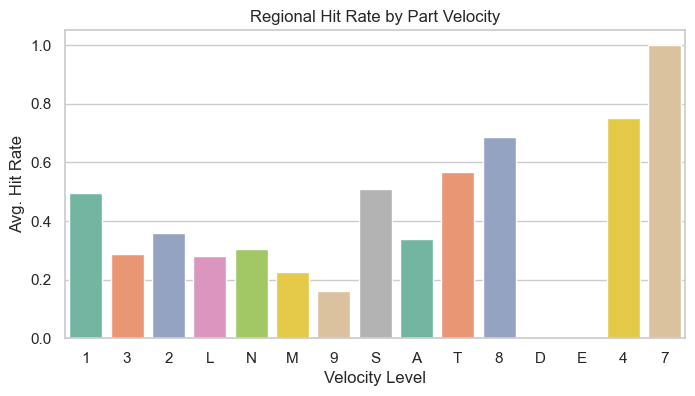

In [5]:
#  1. Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Data
test_df = pd.read_csv("test_data.csv")

# 3. Preprocessing
# Convert types
test_df['suggestion_dt'] = pd.to_datetime(test_df['suggestion_dt'], errors='coerce')
test_df['velocity'] = test_df['velocity'].astype(str)
test_df['expid_desc'] = test_df['expid_desc'].astype(str)

# Create business logic columns
test_df['doh_greater_than_ss'] = test_df['doh_less_ss'] == 0

# Binning for lead time, forecast, demand
test_df['lead_time_bin'] = pd.qcut(test_df['lead_time'], q=4, duplicates='drop')
test_df['fcst_daily_bin'] = pd.qcut(test_df['fcst_daily'], q=4, duplicates='drop')
test_df['dmd_rolling_90d_bin'] = pd.qcut(test_df['dmd_rolling_90d'], q=4, duplicates='drop')

# Style
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# 4.

# A. Velocity vs Hit Rate
plt.figure(figsize=(8, 4))
sns.barplot(x="velocity", y="rhit_label", data=test_df, palette=palette, ci=None)
plt.title("Regional Hit Rate by Part Velocity")
plt.xlabel("Velocity Level")
plt.ylabel("Avg. Hit Rate")
plt.show()


/var/folders/6g/vr6y8lfs07dbnh57d0c1bmkm0000gn/T/ipykernel_77167/1241991951.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="doh_greater_than_ss", y="rhit_label", data=test_df, palette=palette, ci=None)


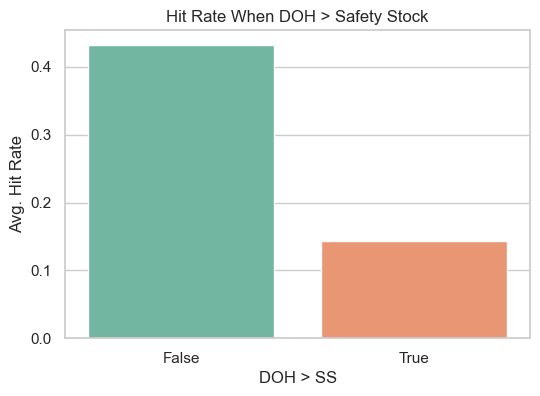

In [6]:
# B. Hits When DOH > Safety Stock
plt.figure(figsize=(6, 4))
sns.barplot(x="doh_greater_than_ss", y="rhit_label", data=test_df, palette=palette, ci=None)
plt.title("Hit Rate When DOH > Safety Stock")
plt.xlabel("DOH > SS")
plt.ylabel("Avg. Hit Rate")
plt.xticks([0, 1], ["False", "True"])
plt.show()


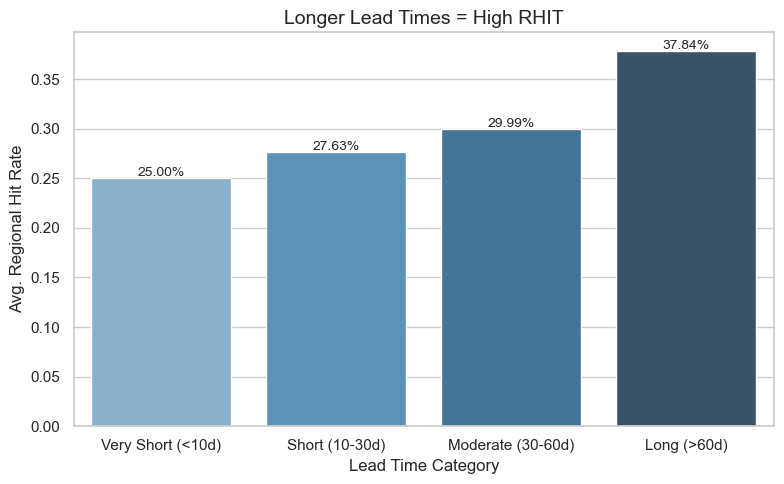

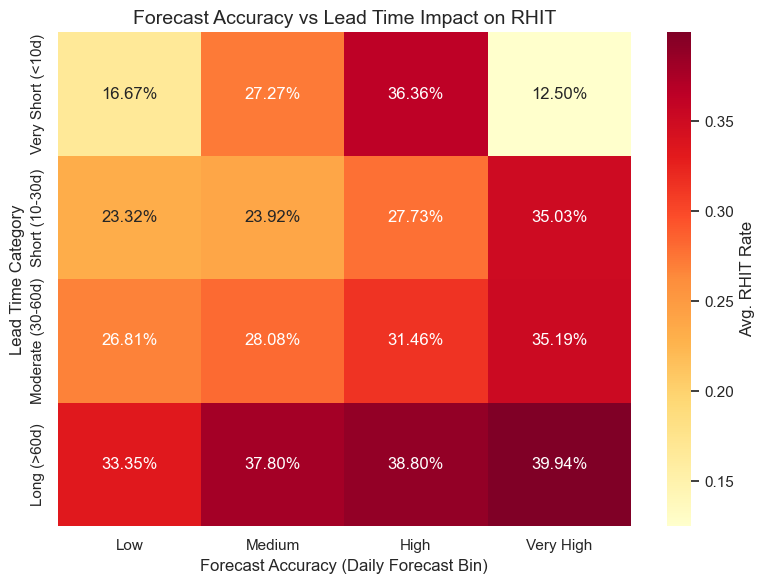

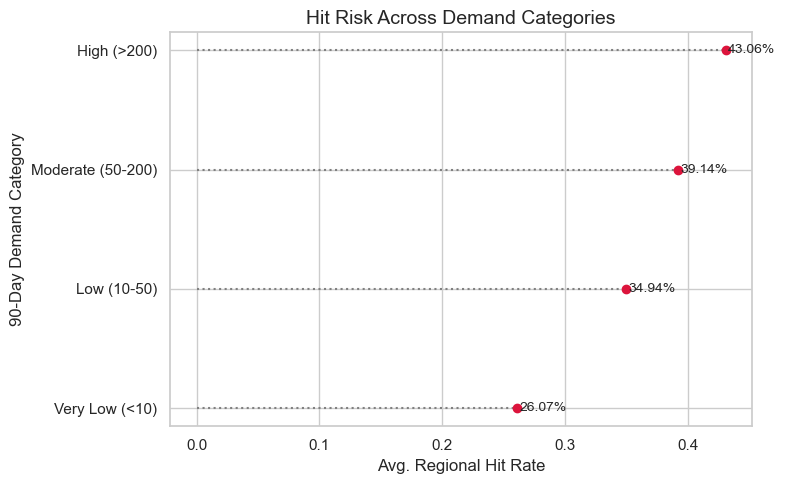

In [30]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your test data
test_df = pd.read_csv("test_data.csv")

# Preprocessing
test_df['lead_time_category'] = pd.cut(test_df['lead_time'], bins=[-1, 10, 30, 60, np.inf],
                                       labels=['Very Short (<10d)', 'Short (10-30d)', 'Moderate (30-60d)', 'Long (>60d)'])

test_df['demand_category'] = pd.cut(test_df['dmd_rolling_90d'], bins=[-1, 10, 50, 200, np.inf],
                                    labels=['Very Low (<10)', 'Low (10-50)', 'Moderate (50-200)', 'High (>200)'])

test_df['forecast_bin'] = pd.qcut(test_df['fcst_daily'], q=4, duplicates='drop', labels=['Low', 'Medium', 'High', 'Very High'])

# Grouped summaries
leadtime_impact = test_df.groupby('lead_time_category')['rhit_label'].mean().reset_index()
forecast_vs_lead = test_df.groupby(['forecast_bin', 'lead_time_category'])['rhit_label'].mean().reset_index()
demand_impact = test_df.groupby('demand_category')['rhit_label'].mean().reset_index()

# Lead Time vs Hit Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=leadtime_impact, x='lead_time_category', y='rhit_label', palette='Blues_d')
plt.title("Longer Lead Times = High RHIT", fontsize=14)
plt.xlabel("Lead Time Category")
plt.ylabel("Avg. Regional Hit Rate")
for i, val in enumerate(leadtime_impact['rhit_label']):
    plt.text(i, val + 0.002, f"{val:.2%}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

#Forecast vs Lead Time - Heatmap
pivot_heatmap = forecast_vs_lead.pivot(index="lead_time_category", columns="forecast_bin", values="rhit_label")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_heatmap, annot=True, fmt=".2%", cmap="YlOrRd", cbar_kws={'label': 'Avg. RHIT Rate'})
plt.title("Forecast Accuracy vs Lead Time Impact on RHIT", fontsize=14)
plt.xlabel("Forecast Accuracy (Daily Forecast Bin)")
plt.ylabel("Lead Time Category")
plt.tight_layout()
plt.show()

#Demand Risk - Lollipop Chart
plt.figure(figsize=(8, 5))
x = demand_impact['rhit_label']
y = demand_impact['demand_category']
plt.hlines(y, 0, x, color='gray', linestyles='dotted')
plt.plot(x, y, "o", color="crimson")
plt.title("Hit Risk Across Demand Categories", fontsize=14)
plt.xlabel("Avg. Regional Hit Rate")
plt.ylabel("90-Day Demand Category")
for i in range(len(x)):
    plt.text(x[i] + 0.002, y[i], f"{x[i]:.2%}", va='center', fontsize=10)
plt.tight_layout()
plt.show()


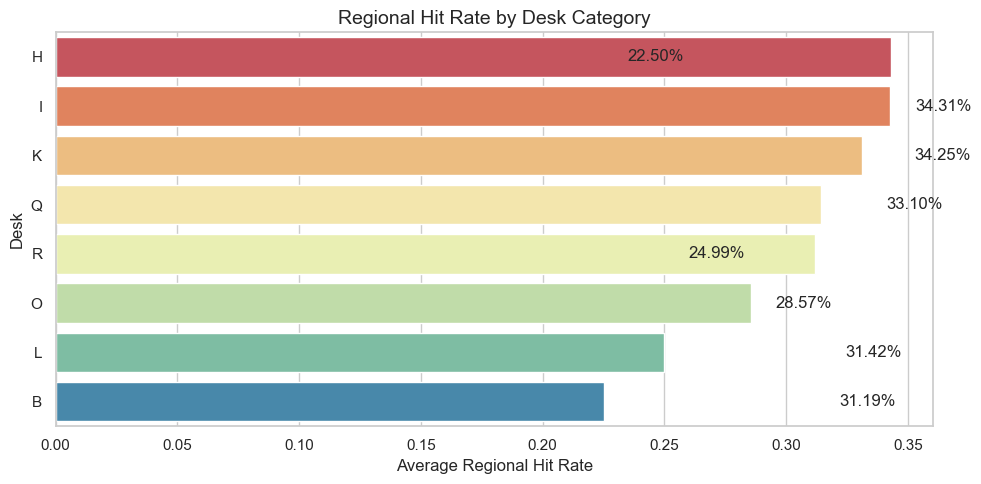

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load test data
df = pd.read_csv("test_data.csv")

# Filter top desks by frequency
top_desks = df['desk'].value_counts().nlargest(8).index

# Calculate hit rates
desk_hit_rate = (
    df[df['desk'].isin(top_desks)]
    .groupby('desk')['rhit_label']
    .mean()
    .reset_index()
    .sort_values(by='rhit_label', ascending=False)
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=desk_hit_rate, x='rhit_label', y='desk', palette='Spectral')
plt.title("Regional Hit Rate by Desk Category", fontsize=14)
plt.xlabel("Average Regional Hit Rate")
plt.ylabel("Desk")
for i, row in desk_hit_rate.iterrows():
    plt.text(row['rhit_label'] + 0.01, i, f"{row['rhit_label']:.2%}", va='center')
plt.tight_layout()
plt.show()

RHIT = 1 rate, grouped by desk , assuming desk are different product lines

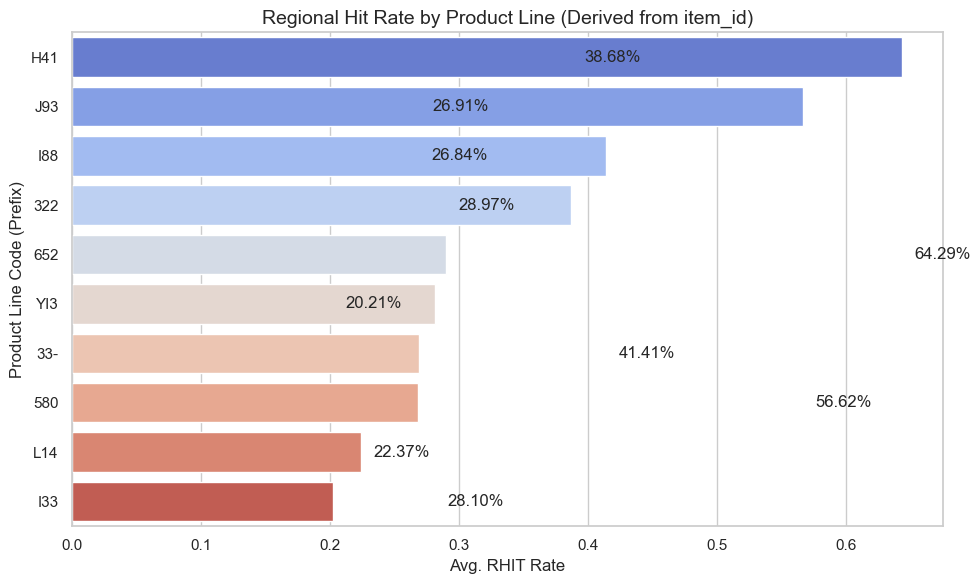

In [13]:
# Step 1: Derive product line from item_id prefix (first 2 or 3 characters based on structure)
df['product_line'] = df['item_id'].astype(str).str[:3]  # change [:2] or [:4] depending on SKU format

# Step 2: Get top product lines by volume
top_lines = df['product_line'].value_counts().nlargest(10).index

# Step 3: Calculate RHIT rate
hit_rate_by_product = (
    df[df['product_line'].isin(top_lines)]
    .groupby('product_line')['rhit_label']
    .mean()
    .reset_index()
    .sort_values(by='rhit_label', ascending=False)
)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hit_rate_by_product, x='rhit_label', y='product_line', palette='coolwarm')
plt.title("Regional Hit Rate by Product Line (Derived from item_id)", fontsize=14)
plt.xlabel("Avg. RHIT Rate")
plt.ylabel("Product Line Code (Prefix)")
for i, row in hit_rate_by_product.iterrows():
    plt.text(row['rhit_label'] + 0.01, i, f"{row['rhit_label']:.2%}", va='center')
plt.tight_layout()
plt.show()

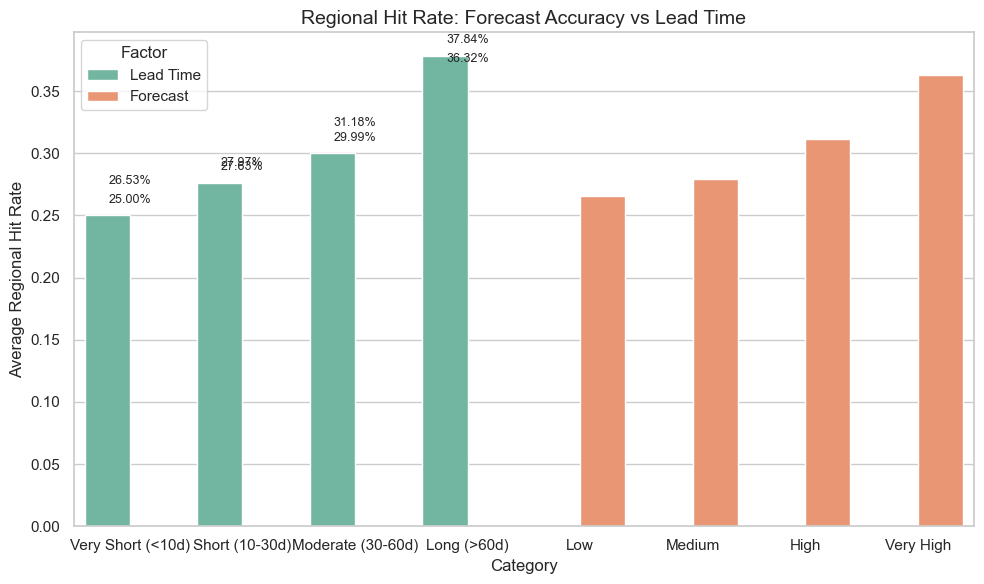

In [11]:
# Group separately
leadtime_summary = df.groupby('lead_time_category')['rhit_label'].mean().reset_index()
forecast_summary = df.groupby('forecast_bin')['rhit_label'].mean().reset_index()

# Combine for side-by-side plot
leadtime_summary['factor'] = 'Lead Time'
forecast_summary['factor'] = 'Forecast'
leadtime_summary.rename(columns={'lead_time_category': 'category'}, inplace=True)
forecast_summary.rename(columns={'forecast_bin': 'category'}, inplace=True)

combined = pd.concat([leadtime_summary, forecast_summary])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=combined, x='category', y='rhit_label', hue='factor', palette='Set2')
plt.title("Regional Hit Rate: Forecast Accuracy vs Lead Time", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Average Regional Hit Rate")
plt.legend(title="Factor")
for i, row in combined.iterrows():
    plt.text(i % 4, row['rhit_label'] + 0.01, f"{row['rhit_label']:.2%}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()


/var/folders/6g/vr6y8lfs07dbnh57d0c1bmkm0000gn/T/ipykernel_77167/2871707821.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['forecast_quality'] = pd.cut(df_filtered['forecast_accuracy'], bins=bins, labels=labels)


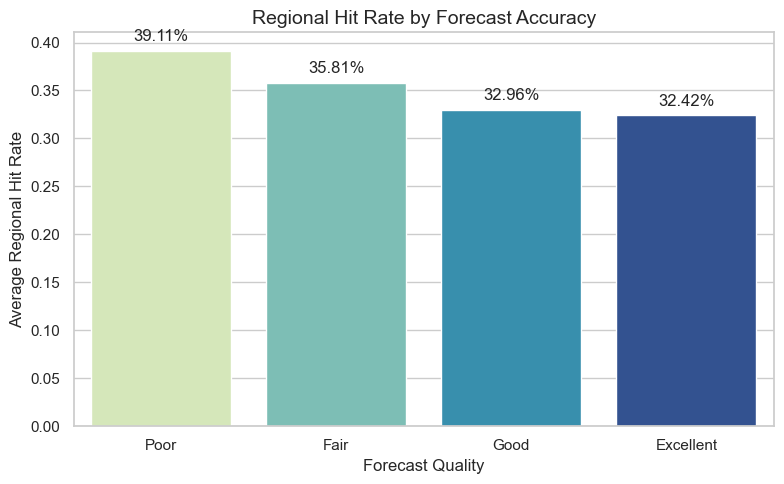

In [29]:
# Step 1: Compute 90-day forecast from daily forecast
df['fcst_90d'] = df['fcst_daily'] * 90

# Step 2: Calculate Forecast Error and Forecast Accuracy
# Formula: Accuracy = 1 - |Forecast - Actual| / Actual
df['forecast_error'] = abs(df['fcst_90d'] - df['dmd_rolling_90d']) / (df['dmd_rolling_90d'] + 1e-9)
df['forecast_accuracy'] = 1 - df['forecast_error']
df['forecast_accuracy'] = df['forecast_accuracy'].clip(0, 1)  # Restrict to 0–1 for clean binning

# Step 3: Filter out low-volume parts (e.g., actual demand < 5 units in 90 days)
df_filtered = df[df['dmd_rolling_90d'] >= 5]

# Step 4: Bin forecast accuracy into fixed quality bands
bins = [0, 0.6, 0.75, 0.9, 1.0]
labels = ['Poor', 'Fair', 'Good', 'Excellent']
df_filtered['forecast_quality'] = pd.cut(df_filtered['forecast_accuracy'], bins=bins, labels=labels)

# Step 5: Calculate average RHIT (regional hit) rate by forecast quality
accuracy_rhit = df_filtered.groupby('forecast_quality')['rhit_label'].mean().reset_index()

# Step 6: Plot the result
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_rhit, x='forecast_quality', y='rhit_label', palette='YlGnBu')
plt.title("Regional Hit Rate by Forecast Accuracy", fontsize=14)
plt.xlabel("Forecast Quality")
plt.ylabel("Average Regional Hit Rate")
for i, row in accuracy_rhit.iterrows():
    plt.text(i, row['rhit_label'] + 0.01, f"{row['rhit_label']:.2%}", ha='center')
plt.tight_layout()
plt.show()

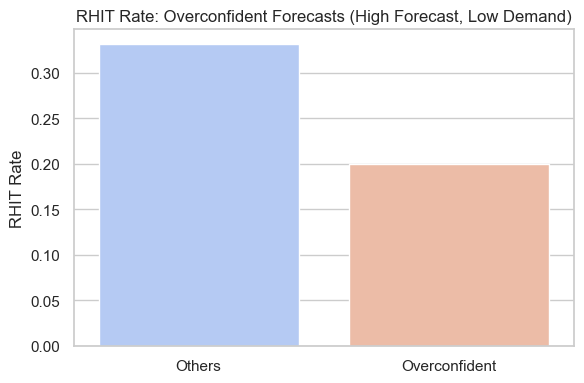

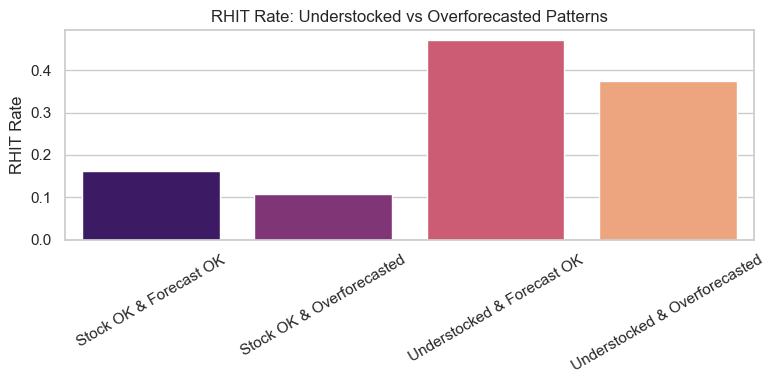

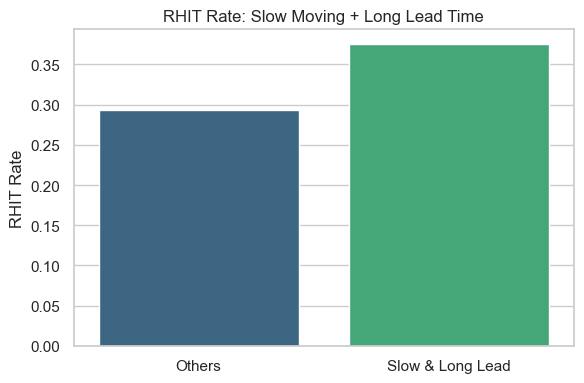

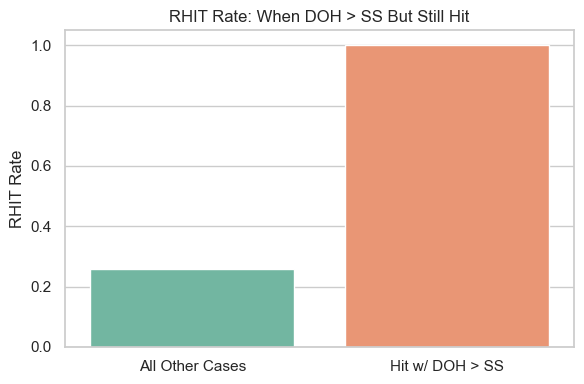

In [16]:
# Forecast-related feature engineering
df['fcst_90d'] = df['fcst_daily'] * 90
df['forecast_error'] = abs(df['fcst_90d'] - df['dmd_rolling_90d']) / (df['dmd_rolling_90d'] + 1e-9)
df['forecast_accuracy'] = (1 - df['forecast_error']).clip(0, 1)

# Compound risk patterns
df['understocked'] = (df['doh_less_ss'] == 1) & (df['dmd_rolling_90d'] > 0)
df['overforecasted'] = (df['fcst_90d'] > df['dmd_rolling_90d']) & (df['forecast_error'] > 0.3)
df['slow_moving'] = (df['fcst_daily'] < 1)
df['hit_when_stock_looks_ok'] = (df['rhit_label'] == 1) & (df['doh_less_ss'] == 0)
df['overconfident'] = (df['fcst_90d'] > df['dmd_rolling_90d'] * 1.5) & (df['dmd_rolling_90d'] < 20)
df['slow_long_lead'] = (df['slow_moving']) & (df['lead_time'] > 60)

# A. Overconfident Forecasts
group_a = df.groupby('overconfident')['rhit_label'].mean().reset_index()
group_a['overconfident'] = group_a['overconfident'].map({True: "Overconfident", False: "Others"})

# B. Understocked vs Overforecasted
group_b = df.groupby(['understocked', 'overforecasted'])['rhit_label'].mean().reset_index()
group_b['Pattern'] = group_b.apply(lambda x: f"{'Understocked' if x['understocked'] else 'Stock OK'} & {'Overforecasted' if x['overforecasted'] else 'Forecast OK'}", axis=1)

# C. Slow + Long Lead
group_c = df.groupby('slow_long_lead')['rhit_label'].mean().reset_index()
group_c['slow_long_lead'] = group_c['slow_long_lead'].map({True: "Slow & Long Lead", False: "Others"})

# D. RHIT when DOH > SS
group_d = df.groupby('hit_when_stock_looks_ok')['rhit_label'].mean().reset_index()
group_d['hit_when_stock_looks_ok'] = group_d['hit_when_stock_looks_ok'].map({True: "Hit w/ DOH > SS", False: "All Other Cases"})

# Plot A
plt.figure(figsize=(6,4))
sns.barplot(data=group_a, x='overconfident', y='rhit_label', palette='coolwarm')
plt.title("RHIT Rate: Overconfident Forecasts (High Forecast, Low Demand)")
plt.ylabel("RHIT Rate")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Plot B
plt.figure(figsize=(8,4))
sns.barplot(data=group_b, x='Pattern', y='rhit_label', palette='magma')
plt.title("RHIT Rate: Understocked vs Overforecasted Patterns")
plt.ylabel("RHIT Rate")
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot C
plt.figure(figsize=(6,4))
sns.barplot(data=group_c, x='slow_long_lead', y='rhit_label', palette='viridis')
plt.title("RHIT Rate: Slow Moving + Long Lead Time")
plt.ylabel("RHIT Rate")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Plot D
plt.figure(figsize=(6,4))
sns.barplot(data=group_d, x='hit_when_stock_looks_ok', y='rhit_label', palette='Set2')
plt.title("RHIT Rate: When DOH > SS But Still Hit")
plt.ylabel("RHIT Rate")
plt.xlabel("")
plt.tight_layout()
plt.show()

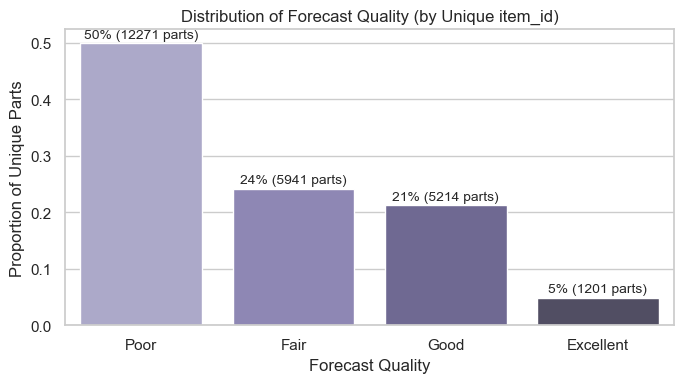

In [18]:
#Calculate forecast accuracy per row
df['fcst_90d'] = df['fcst_daily'] * 90
df['forecast_error'] = abs(df['fcst_90d'] - df['dmd_rolling_90d']) / (df['dmd_rolling_90d'] + 1e-9)
df['forecast_accuracy'] = (1 - df['forecast_error']).clip(0, 1)

#Aggregate forecast accuracy per item_id (unique part)
df_item = df.groupby('item_id').agg({
    'forecast_accuracy': 'mean',
    'rhit_label': 'mean'
}).reset_index()

# forecast quality buckets
df_item['forecast_quality'] = pd.cut(
    df_item['forecast_accuracy'],
    bins=[-0.01, 0.6, 0.75, 0.9, 1.0],
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)

# Count and normalize proportions
quality_counts_item = df_item['forecast_quality'].value_counts(normalize=True).sort_index()
quality_absolute_item = df_item['forecast_quality'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(7, 4))
sns.barplot(x=quality_counts_item.index, y=quality_counts_item.values, palette="Purples_d")
plt.title("Distribution of Forecast Quality (by Unique item_id)")
plt.ylabel("Proportion of Unique Parts")
plt.xlabel("Forecast Quality")
for i, val in enumerate(quality_counts_item.values):
    plt.text(i, val + 0.01, f"{val:.0%} ({quality_absolute_item.iloc[i]} parts)", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

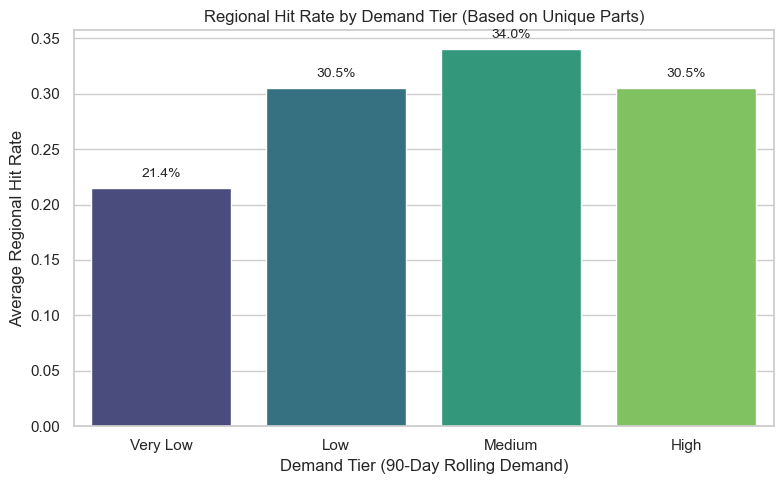

In [19]:
# Step 1: Define demand tiers using 90-day demand
demand_bins = [-1, 50, 200, 500, df['dmd_rolling_90d'].max()]
demand_labels = ['Very Low', 'Low', 'Medium', 'High']
df['demand_tier'] = pd.cut(df['dmd_rolling_90d'], bins=demand_bins, labels=demand_labels)

# Step 2: Aggregate RHIT by item and demand tier
part_level_rhit = df.groupby(['item_id', 'demand_tier']).agg({
    'rhit_label': 'mean'
}).reset_index()

# Step 3: Calculate RHIT rate per demand tier
rhit_by_demand = part_level_rhit.groupby('demand_tier')['rhit_label'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=rhit_by_demand, x='demand_tier', y='rhit_label', palette='viridis')
plt.title("Regional Hit Rate by Demand Tier (Based on Unique Parts)")
plt.xlabel("Demand Tier (90-Day Rolling Demand)")
plt.ylabel("Average Regional Hit Rate")
for i, val in enumerate(rhit_by_demand['rhit_label']):
    plt.text(i, val + 0.01, f"{val:.1%}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

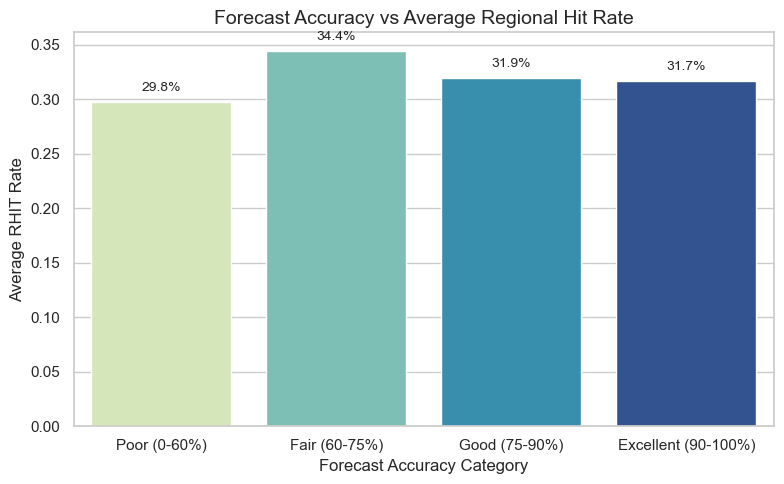

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("test_data.csv")

# Step 1: Create a 90-day forecast column
df['fcst_90d'] = df['fcst_daily'] * 90

# Step 2: Compute forecast error and accuracy
df['forecast_error'] = abs(df['fcst_90d'] - df['dmd_rolling_90d']) / (df['dmd_rolling_90d'] + 1e-9)
df['forecast_accuracy'] = (1 - df['forecast_error']).clip(0, 1)

# Step 3: Bin forecast accuracy into categories
df['forecast_accuracy_bin'] = pd.cut(df['forecast_accuracy'],
    bins=[-0.01, 0.6, 0.75, 0.9, 1.0],
    labels=['Poor (0-60%)', 'Fair (60-75%)', 'Good (75-90%)', 'Excellent (90-100%)']
)

# Step 4: Calculate RHIT rate by accuracy group
rhit_by_accuracy = df.groupby('forecast_accuracy_bin')['rhit_label'].mean().reset_index()

# Step 5: Visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=rhit_by_accuracy, x='forecast_accuracy_bin', y='rhit_label', palette='YlGnBu')
plt.title("Forecast Accuracy vs Average Regional Hit Rate", fontsize=14)
plt.xlabel("Forecast Accuracy Category")
plt.ylabel("Average RHIT Rate")

# Add data labels
for i, val in enumerate(rhit_by_accuracy['rhit_label']):
    plt.text(i, val + 0.01, f"{val:.1%}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


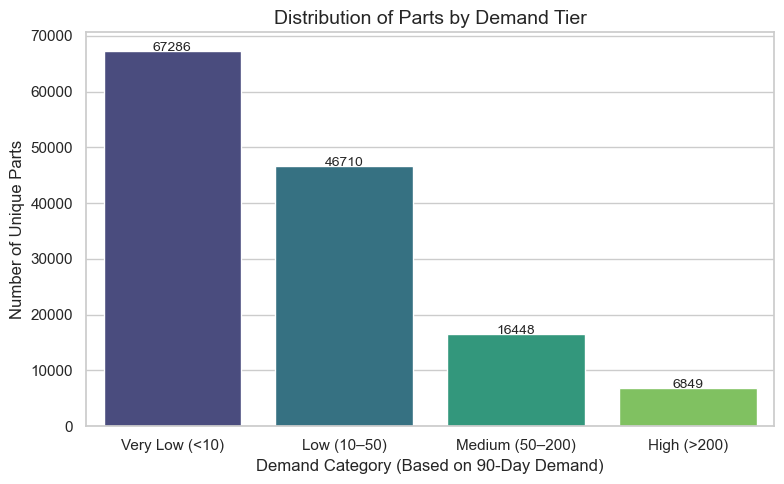

In [23]:
# Step 1: Bin 90-day demand into demand tiers
demand_bins = [-1, 10, 50, 200, float('inf')]
demand_labels = ['Very Low (<10)', 'Low (10–50)', 'Medium (50–200)', 'High (>200)']
df['demand_tier'] = pd.cut(df['dmd_rolling_90d'], bins=demand_bins, labels=demand_labels)

# Step 2: Count number of parts per demand tier
demand_dist = df['demand_tier'].value_counts().sort_index().reset_index()
demand_dist.columns = ['Demand Tier', 'Number of Parts']

# Step 3: Visualize part distribution by demand level
plt.figure(figsize=(8, 5))
sns.barplot(data=demand_dist, x='Demand Tier', y='Number of Parts', palette='viridis')
plt.title("Distribution of Parts by Demand Tier", fontsize=14)
plt.ylabel("Number of Unique Parts")
plt.xlabel("Demand Category (Based on 90-Day Demand)")

# Add data labels (fixed column name typo)
for i, row in demand_dist.iterrows():
    plt.text(i, row['Number of Parts'] + 2, row['Number of Parts'], ha='center', fontsize=10)


plt.tight_layout()
plt.show()

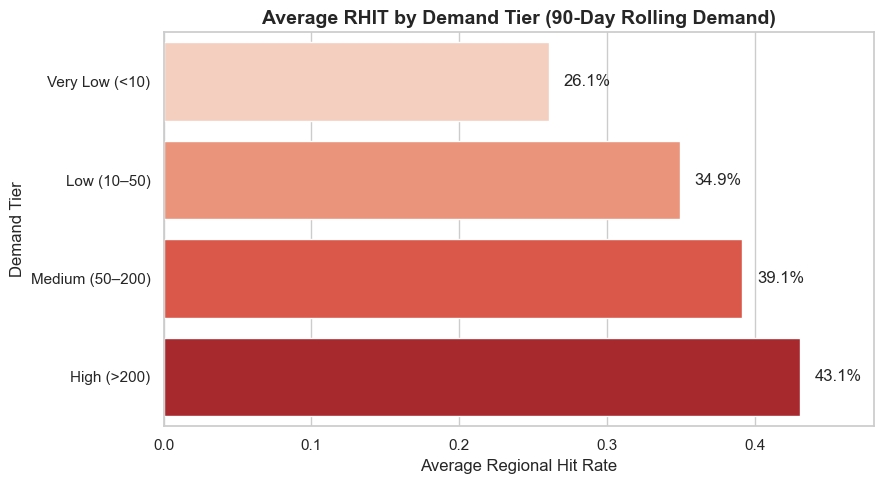

In [33]:
plt.figure(figsize=(9, 5))
colors = sns.color_palette("Reds", len(rhit_by_demand))

sns.barplot(data=rhit_by_demand, 
            y='Demand Tier', x='RHIT Rate',
            palette=colors)

for i, row in rhit_by_demand.iterrows():
    plt.text(row['RHIT Rate'] + 0.01, i, f"{row['RHIT Rate']:.1%}", va='center')

plt.title("Average RHIT by Demand Tier (90-Day Rolling Demand)", fontsize=14, weight='bold')
plt.xlabel("Average Regional Hit Rate")
plt.ylabel("Demand Tier")
plt.xlim(0, rhit_by_demand['RHIT Rate'].max() + 0.05)
plt.tight_layout()
plt.show()

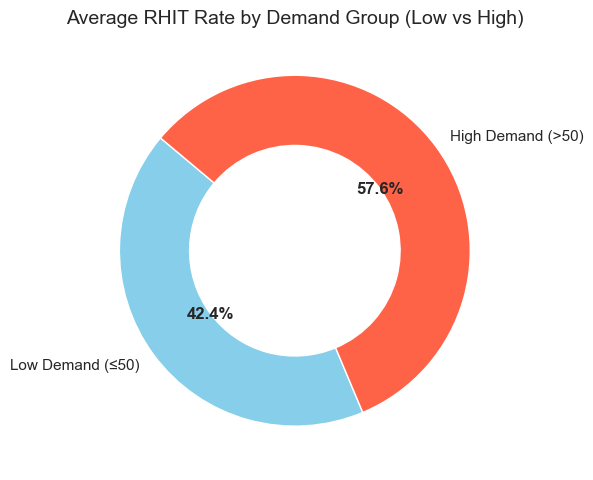

In [25]:
# Step 1: Classify parts into Low vs High demand
df['demand_level'] = pd.cut(df['dmd_rolling_90d'],
                            bins=[-1, 50, float('inf')],
                            labels=['Low Demand (≤50)', 'High Demand (>50)'])

# Step 2: Calculate average RHIT rate by demand group
rhit_summary = df.groupby('demand_level')['rhit_label'].mean().reset_index()

# Step 3: Plot — donut chart
plt.figure(figsize=(6, 6))
colors = ['skyblue', 'tomato']
wedges, texts, autotexts = plt.pie(rhit_summary['rhit_label'],
                                   labels=rhit_summary['demand_level'],
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=colors,
                                   wedgeprops=dict(width=0.4))

plt.setp(autotexts, size=12, weight="bold")
plt.title("Average RHIT Rate by Demand Group (Low vs High)", fontsize=14)
plt.tight_layout()
plt.show()

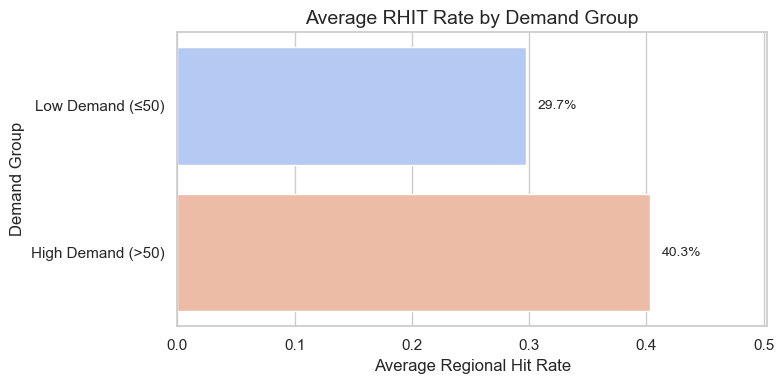

In [26]:
df['demand_group'] = pd.cut(df['dmd_rolling_90d'],
                            bins=[-1, 50, float('inf')],
                            labels=['Low Demand (≤50)', 'High Demand (>50)'])

# Step 2: Calculate average RHIT rate per group
rhit_by_group = df.groupby('demand_group')['rhit_label'].mean().reset_index()

# Step 3: Plot - Horizontal bar for clear comparison
plt.figure(figsize=(8, 4))
sns.barplot(data=rhit_by_group, x='rhit_label', y='demand_group', palette='coolwarm')
plt.xlabel("Average Regional Hit Rate")
plt.ylabel("Demand Group")
plt.title("Average RHIT Rate by Demand Group", fontsize=14)

# Add % labels
for index, row in rhit_by_group.iterrows():
    plt.text(row['rhit_label'] + 0.01, index, f"{row['rhit_label']:.1%}", va='center', fontsize=10)

plt.xlim(0, rhit_by_group['rhit_label'].max() + 0.1)
plt.tight_layout()
plt.show()

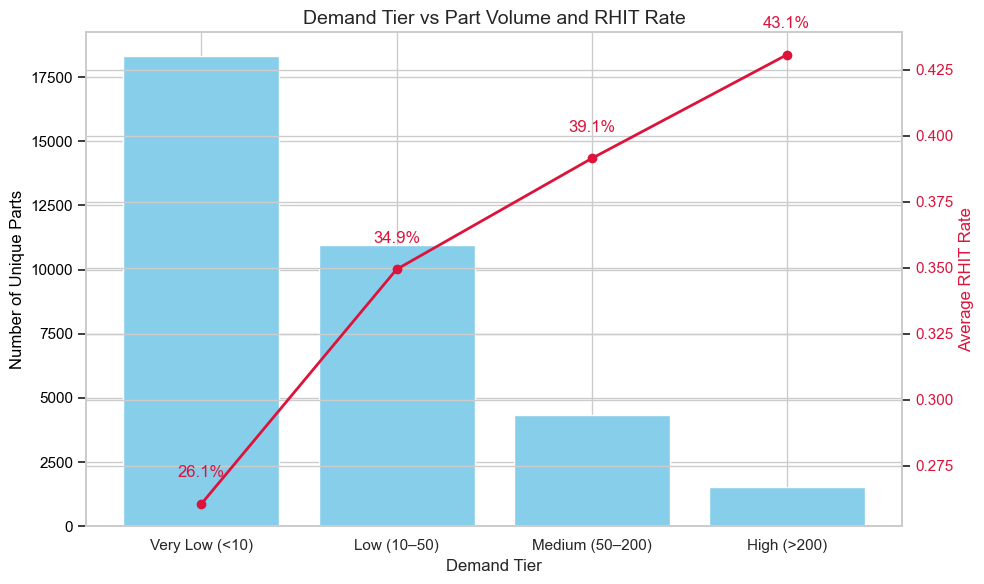

In [36]:
# # Load your data
# df = pd.read_csv("test_data.csv")

# Define demand tiers
bins = [-1, 10, 50, 200, float('inf')]
labels = ['Very Low (<10)', 'Low (10–50)', 'Medium (50–200)', 'High (>200)']
df['demand_tier'] = pd.cut(df['dmd_rolling_90d'], bins=bins, labels=labels)

# Aggregate data
summary_df = df.groupby('demand_tier').agg(
    Part_Count=('item_id', 'nunique'),
    Avg_RHIT=('rhit_label', 'mean')
).reset_index()

# Create dual-axis chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for part counts
ax1.bar(summary_df['demand_tier'], summary_df['Part_Count'], color='skyblue')
ax1.set_ylabel('Number of Unique Parts', color='black')
ax1.set_xlabel('Demand Tier')
ax1.tick_params(axis='y', labelcolor='black')

# Line plot for RHIT rate
ax2 = ax1.twinx()
ax2.plot(summary_df['demand_tier'], summary_df['Avg_RHIT'], color='crimson', marker='o', linewidth=2)
ax2.set_ylabel('Average RHIT Rate', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Annotate RHIT values
for x, y in zip(summary_df['demand_tier'], summary_df['Avg_RHIT']):
    ax2.text(x, y + 0.01, f"{y:.1%}", ha='center', color='crimson')

plt.title("Demand Tier vs Part Volume and RHIT Rate", fontsize=14)
plt.tight_layout()
plt.show()